# Week 15
Implement Generative Adversarial Networks to generate realistic Images. Use MNIST dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

generator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0002, beta_1=0.5)

In [ ]:
@tf.function
def train_step(real_images):
    batch_size = real_images.shape[0]
    # Random noise for the generator
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)

        fake_output = discriminator(fake_images, training=True)

        disc_loss = (cross_entropy(tf.ones_like(real_output), real_output) +
                     cross_entropy(tf.zeros_like(fake_output), fake_output)) / 2

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

    gradients_of_generator = gen_tape.gradient(
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(
        zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(
        zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [ ]:
def display_generated_images(generator, num_images=16):
    noise = tf.random.normal([num_images, 100])
    generated_images = generator(noise, training=False)

    plt.figure(figsize=(4, 4))
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

c:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


c:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Generator Loss: 1.5390284061431885, Discriminator Loss: 0.3053956627845764
Epoch 2/20
Generator Loss: 1.4597219228744507, Discriminator Loss: 0.28754156827926636
Epoch 3/20
Generator Loss: 3.097564458847046, Discriminator Loss: 0.15980227291584015
Epoch 4/20
Generator Loss: 3.027466297149658, Discriminator Loss: 0.25592005252838135
Epoch 5/20
Generator Loss: 2.883326292037964, Discriminator Loss: 0.13926377892494202


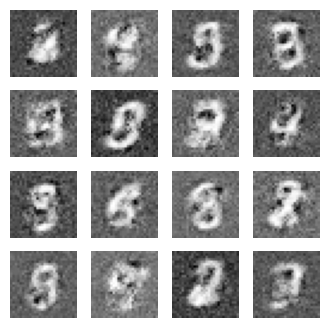

Epoch 6/20
Generator Loss: 4.105806350708008, Discriminator Loss: 0.2327147275209427
Epoch 7/20
Generator Loss: 3.2976865768432617, Discriminator Loss: 0.11942991614341736
Epoch 8/20
Generator Loss: 5.53501033782959, Discriminator Loss: 0.22503487765789032
Epoch 9/20
Generator Loss: 5.227360725402832, Discriminator Loss: 0.07671931385993958
Epoch 10/20
Generator Loss: 6.886699199676514, Discriminator Loss: 0.09246193617582321


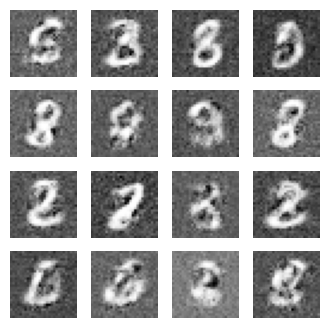

Epoch 11/20
Generator Loss: 5.688479423522949, Discriminator Loss: 0.017664987593889236
Epoch 12/20
Generator Loss: 7.151930809020996, Discriminator Loss: 0.1393774002790451
Epoch 13/20
Generator Loss: 7.037715911865234, Discriminator Loss: 0.03032461553812027
Epoch 14/20
Generator Loss: 6.006175518035889, Discriminator Loss: 0.010702083818614483
Epoch 15/20
Generator Loss: 6.018783092498779, Discriminator Loss: 0.035004422068595886


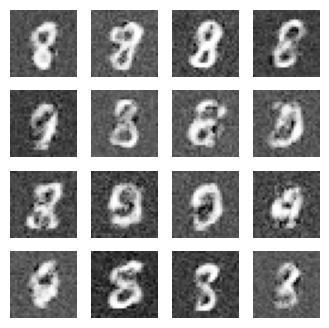

Epoch 16/20
Generator Loss: 9.26129150390625, Discriminator Loss: 0.010809039697051048
Epoch 17/20
Generator Loss: 6.356866836547852, Discriminator Loss: 0.035886358469724655
Epoch 18/20
Generator Loss: 5.745133876800537, Discriminator Loss: 0.07219603657722473
Epoch 19/20
Generator Loss: 7.418005466461182, Discriminator Loss: 0.055707626044750214
Epoch 20/20
Generator Loss: 8.297893524169922, Discriminator Loss: 0.0581364631652832


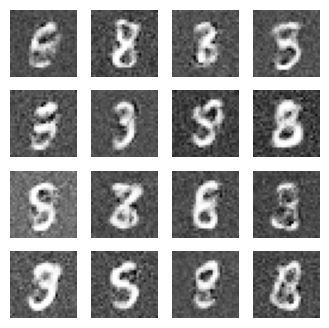

In [ ]:
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
train_images = train_images[..., np.newaxis]

BUFFER_SIZE = 60000
BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices(
    train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

generator = build_generator()
discriminator = build_discriminator()

epochs = 20
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for real_images in train_dataset:
        gen_loss, disc_loss = train_step(real_images)

    print(
        f"Generator Loss: {gen_loss.numpy()}, Discriminator Loss: {disc_loss.numpy()}")

    if (epoch + 1) % 5 == 0:
        display_generated_images(generator)